In [15]:
# Step 0. Import libraries and custom modules
# Basics ---------------------------------------------------
import logging
# Data -----------------------------------------------------
import pandas as pd
import numpy as np
# Graphics -------------------------------------------------
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Machine learning -----------------------------------------
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.metrics import (accuracy_score, 
                             confusion_matrix, 
                             ConfusionMatrixDisplay)
from sklearn.preprocessing import (OneHotEncoder,
                                   LabelEncoder)

In [2]:
# Step 1. Load data and wrangle
# 1.1 Read from source and get basic info
url = ('https://gist.githubusercontent.com/teamtom/' + 
       '1af7b484954b2d4b7e981ea3e7a27f24/raw/' + 
       '114fb69dce56b4462a9c3a417e7402330616ad4f/' + 
       'titanic_full.csv')
df_raw = pd.read_csv(url)
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  746 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


In [3]:
# 1.2 Get a sample
display(df_raw.sample(10, random_state=2024))

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
1077,3,0,Franklin Mr. Charles Charles Fardon,male,NaN,0,0,SOTON/O.Q. 3101314,7.2500,NaN,S,NaN,NaN,NaN
1177,3,0,Lindell Mrs. Edvard Bengtsson Elin Gerda Persson,female,30.0,1,0,349910,15.5500,NaN,S,A,NaN,NaN
1164,1,1,Beckwith Mrs. Richard Leonard Sallie Monypeny,female,47.0,1,1,11751,52.5542,D35,S,5,NaN,New York NY
370,3,1,Murphy Miss. Katherine Kate,female,NaN,1,0,367230,15.5000,NaN,Q,16,NaN,NaN
971,3,1,Hakkarainen Mrs. Pekka Pietari Elin Matilda Dolck,female,24.0,1,0,STON/O2. 3101279,15.8500,NaN,S,15,NaN,NaN
342,3,0,Danbom Mr. Ernst Gilbert,male,34.0,1,1,347080,14.4000,NaN,S,NaN,197.0,Stanton IA
459,1,0,Hipkins Mr. William Edward,male,55.0,0,0,680,50.0000,C39,S,NaN,NaN,London / Birmingham
365,3,0,Andersson Miss. Ellis Anna Maria,female,2.0,4,2,347082,31.2750,NaN,S,NaN,NaN,Sweden Winnipeg MN
69,3,0,Wiklund Mr. Karl Johan,male,21.0,1,0,3101266,6.4958,NaN,S,NaN,NaN,NaN
232,1,1,Harper Mrs. Henry Sleeper Myna Haxtun,female,49.0,1,0,PC 17572,76.7292,D33,C,3,NaN,New York NY


In [10]:
# 1.3 Make transformations
df_interim = (
    df_raw
    .drop(['ticket','boat','body','home.dest','cabin','name'], axis=1)
    .drop_duplicates()
    .astype({'survived':'category', 
             'pclass': 'category', 
             'sex': 'category',
             'embarked':'category'})
)
df = df_interim.copy()

In [11]:
# Step 2. Perform EDA
# 2.1 Split the dataset
df_train, df_test = train_test_split(df, 
                                     random_state=2024, 
                                     test_size=0.20, 
                                     stratify=df['survived'])
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 540 to 744
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    891 non-null    category
 1   survived  891 non-null    category
 2   sex       891 non-null    category
 3   age       779 non-null    float64 
 4   sibsp     891 non-null    int64   
 5   parch     891 non-null    int64   
 6   fare      890 non-null    float64 
 7   embarked  889 non-null    category
dtypes: category(4), float64(2), int64(2)
memory usage: 38.8 KB


In [13]:
# 2.1 Get numerical and categorical summaries
display(df_train.describe(include='number').T)
display(df_train.describe(include='category').T)

,count,mean,std,min,25%,50%,75%,max
age,779.0,29.933787,15.040307,0.17,20.25,28.0,39.0000,80.0000
sibsp,891.0,0.537598,0.992947,0.00,0.00,0.0,1.0000,8.0000
parch,891.0,0.436588,0.895160,0.00,0.00,0.0,1.0000,9.0000
fare,890.0,37.414035,58.028996,0.00,8.05,15.8,34.5844,512.3292


,count,unique,top,freq
pclass,891,3,3,458
survived,891,2,0,517
sex,891,2,male,555
embarked,889,3,S,622


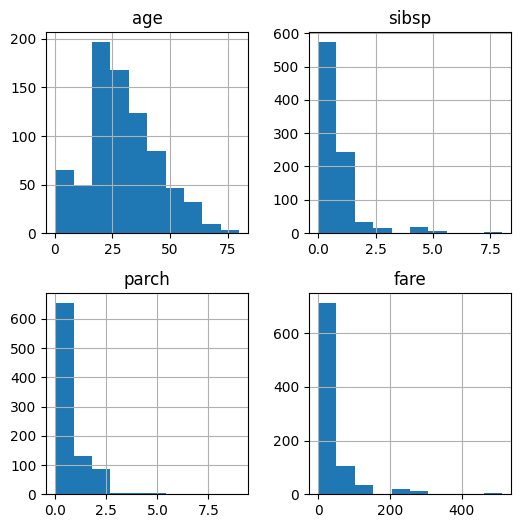

In [28]:
# 2.2 Perform univariate analysis on numerical variables
df_train.hist(figsize=(6,6))
plt.show()

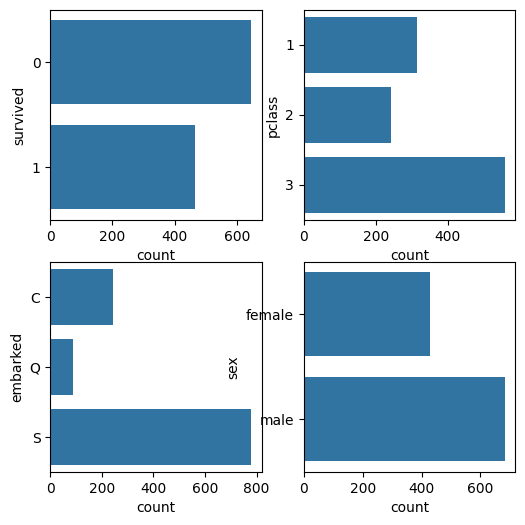

In [31]:
# 2.3 Perform univariate analysis for categorical variables
fig, ax = plt.subplots(2,2, figsize=(6,6))
sns.countplot(data=df, y='survived', ax=ax[0,0])
sns.countplot(data=df, y='pclass', ax=ax[0,1])
sns.countplot(data=df, y='embarked', ax=ax[1,0])
sns.countplot(data=df, y='sex', ax=ax[1,1])
plt.show()